In [2]:
#Imports
import sys
import os
import numpy as np
from ast import literal_eval
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostRegressor
from collections import Counter

from sklearn.linear_model import LinearRegression

from model_inputs import split_on_h_group
import matplotlib.pyplot as plt
import seaborn as sns
import tables
import time
from scipy import stats

import pdb

Average lddt:
0.7223256797956673


(array([5.000e+00, 7.000e+00, 3.000e+00, 3.000e+00, 8.000e+00, 3.000e+01,
        5.900e+01, 1.700e+02, 4.720e+02, 9.090e+02, 1.734e+03, 2.834e+03,
        4.137e+03, 5.184e+03, 5.459e+03, 5.386e+03, 4.702e+03, 3.283e+03,
        2.076e+03, 7.340e+02]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

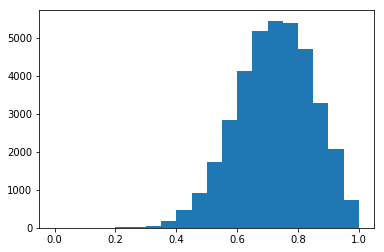

In [84]:
#Read df
complete_df = pd.read_csv('/home/pbryant/results/CATH/20190606/complete_df.csv')
print('Average lddt:' )
print(sum(complete_df['global_lddt'])/len(complete_df))
plt.hist(complete_df['global_lddt'], bins = 20)

/home/pbryant/anaconda_ete/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Average predicted lddt:  0.6963698913138098


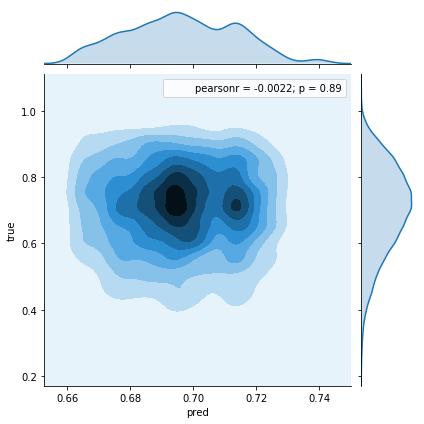

In [85]:
df = pd.read_csv('validation.tsv', sep = '\t')
df.columns=['pred', 'true']
true = []
pred = []
for i in range(0,len(df['pred'])):
    pred.append(literal_eval(df['pred'][i])[0])
    true.append(literal_eval(df['true'][i])[0])
df['true'] = true
df['pred'] = pred
g = sns.jointplot(x='pred', y = 'true', data = df, kind = 'kde')
g.annotate(stats.pearsonr)
print('Average predicted lddt: ', np.average(pred) )

Average error 0.1059263101262762


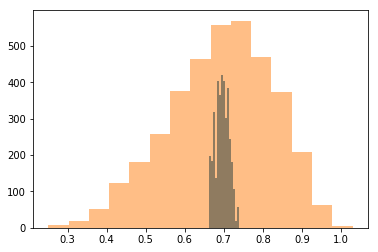

In [90]:
plt.hist(df['pred'], bins = 15)
plt.hist(df['true'], bins = 15, alpha = 0.5)
print('Average error',np.average(np.absolute(df['true']-df['pred'])))

In [3]:
df = pd.read_csv('validation.tsv', sep = '\t')
df.columns=['pred', 'true']
classes =['below','on','above']
y_true = np.asarray([*df['true']])
y_pred = np.asarray([*df['pred']])
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots()
cmap=plt.cm.Blues
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        # ... and label them with the respective list entries
        xticklabels=classes, yticklabels=classes,
        title='Confusion matrix',
        ylabel='True label',
        xlabel='Predicted label')
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

np.set_printoptions(precision=2)
plt.show()

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [25]:
df = pd.read_csv('lr_plot.tsv', sep = '\t')
df.columns = ['lr', 'loss']

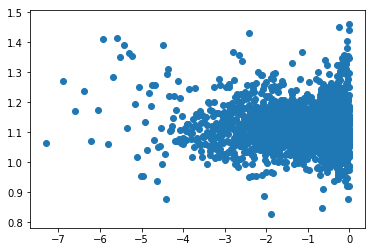

In [40]:
log_x = np.log(df['lr'])
y = df['loss']
df =  pd.DataFrame(list(zip(log_x,y)), columns = ['lr', 'loss'])
plt.scatter(log_x,y)